# Assignment 1 ML
   ### Maggie Ezzat Gamil Gaid 37-575 T-1
   ### Mariz Samir Mounir Awad 37-2632  T-2

**Imports Used**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Training Phase:

**1. Reading Files and flattening the 2D arrays**

**2. Storing the training set into 1 data matrix and appending 1 to each image**

**3. Calculating A = (X_transpose . X)^-1 . X_transpose**

In [2]:
train_dir = "./Train/"

#train_data is X
train_data = np.zeros(shape=(1,785)).astype(int)

for i in range(1,2401):
    file_name = train_dir+ str(i)+".jpg"
    img = plt.imread(file_name)
    img = img.flatten()
    img = np.append(img, 1)
    train_data = np.vstack((train_data, img))


#remove the first zero row in the matrix initizalization        
train_data = np.delete(train_data, (0), axis=0)   

#get X transpose
train_data_transpose = train_data.transpose()
print(train_data.shape)
print(train_data_transpose.shape)

#X transpose . X
A = np.matmul(train_data_transpose, train_data)
print(A.shape)
# (X transpose . X)^-1
A = np.linalg.pinv(A)
# ((X transpose . X)^-1 . X transpose)
A = np.matmul(A, train_data_transpose)
print(A.shape)


(2400, 785)
(785, 2400)
(785, 785)
(785, 2400)


**4. Preparing the t vector for each classifier:**

In [3]:
t0 = np.zeros(shape=(2400,1)).astype(int)
t1 = np.zeros(shape=(2400,1)).astype(int)
t2 = np.zeros(shape=(2400,1)).astype(int)
t3 = np.zeros(shape=(2400,1)).astype(int)
t4 = np.zeros(shape=(2400,1)).astype(int)
t5 = np.zeros(shape=(2400,1)).astype(int)
t6 = np.zeros(shape=(2400,1)).astype(int)
t7 = np.zeros(shape=(2400,1)).astype(int)
t8 = np.zeros(shape=(2400,1)).astype(int)
t9 = np.zeros(shape=(2400,1)).astype(int)

file_name = train_dir + "Training Labels.txt"
with open(file_name, 'r') as f:
    labels = f.readlines()
    for i in range(0, len(labels)):
        labels[i] = (int)(labels[i])
        t0[i] = (labels[i] == 0)
        t1[i] = (labels[i] == 1)
        t2[i] = (labels[i] == 2)
        t3[i] = (labels[i] == 3)
        t4[i] = (labels[i] == 4)
        t5[i] = (labels[i] == 5)
        t6[i] = (labels[i] == 6)
        t7[i] = (labels[i] == 7)
        t8[i] = (labels[i] == 8)
        t9[i] = (labels[i] == 9)
  

t0[t0==0] = -1
t1[t1==0] = -1
t2[t2==0] = -1
t3[t3==0] = -1
t4[t4==0] = -1
t5[t5==0] = -1
t6[t6==0] = -1
t7[t7==0] = -1
t8[t8==0] = -1
t9[t9==0] = -1

print(t0.shape)

(2400, 1)


**5. Calculate the weights vectors for each classifier, as well as transpose of weights**

In [4]:
w0 = np.matmul(A, t0)
w1 = np.matmul(A, t1)
w2 = np.matmul(A, t2)
w3 = np.matmul(A, t3)
w4 = np.matmul(A, t4)
w5 = np.matmul(A, t5)
w6 = np.matmul(A, t6)
w7 = np.matmul(A, t7)
w8 = np.matmul(A, t8)
w9 = np.matmul(A, t9)
print(w9.shape)

w0_t = w0.transpose() 
w1_t = w1.transpose() 
w2_t = w2.transpose() 
w3_t = w3.transpose() 
w4_t = w4.transpose() 
w5_t = w5.transpose() 
w6_t = w6.transpose() 
w7_t = w7.transpose() 
w8_t = w8.transpose() 
w9_t = w9.transpose() 
print(w0_t.shape)


(785, 1)
(1, 785)


## Test Phase:

**1. Get the true labels**


**2. Get the predicted labels**

In [5]:
test_dir = "./Test/"

file_name = test_dir + "Test Labels.txt"      
with open(file_name, 'r') as f:
    test_labels = f.readlines()
    print(len(test_labels))
    for i in range(0, len(test_labels)):
        test_labels[i] = (int)(test_labels[i])
                
predicted_labels = [0]*200

for i in range(1, 201):
    file_name = test_dir+ str(i)+".jpg"
    img = plt.imread(file_name)
    img = img.flatten()
    img = np.append(img, 1)
    c0 = np.dot(w0_t, img)
    c1 = np.dot(w1_t, img)
    c2 = np.dot(w2_t, img)
    c3 = np.dot(w3_t, img)
    c4 = np.dot(w4_t, img)
    c5 = np.dot(w5_t, img)
    c6 = np.dot(w6_t, img)
    c7 = np.dot(w7_t, img)
    c8 = np.dot(w8_t, img)
    c9 = np.dot(w9_t, img)
    arr = [c0, c1, c2, c3, c4, c5, c6, c7, c8, c9 ]
    predicted_labels[i-1] = arr.index(max(arr))

print(predicted_labels)
print(test_labels)
 

200
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 4, 3, 2, 3, 2, 1, 5, 2, 2, 4, 2, 2, 2, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 7, 4, 4, 4, 4, 4, 4, 9, 8, 5, 5, 3, 5, 5, 5, 5, 5, 5, 9, 8, 6, 5, 5, 5, 9, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 2, 7, 9, 7, 7, 7, 7, 3, 8, 5, 8, 9, 5, 8, 8, 8, 8, 8, 8, 8, 8, 2, 8, 8, 8, 8, 8, 5, 9, 7, 9, 7, 7, 9, 3, 5, 9, 9, 4, 9, 9, 9, 7, 9, 9, 0, 9, 9]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

**3. Construct a confusion matrix using the true labels and the predicted labels**

In [6]:
confusion = np.zeros((10, 10), dtype=int)

for i in range(len(test_labels)):
    confusion[test_labels[i]][predicted_labels[i]]+=1

confusion

array([[19,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  3, 11,  2,  2,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 17,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  1,  0, 14,  1,  0,  2,  2],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0, 15,  0,  3],
       [ 0,  0,  1,  0,  0,  3,  0,  0, 15,  1],
       [ 1,  0,  0,  1,  1,  1,  0,  4,  0, 12]])

In [7]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix'):
    
    fig =  plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    fig.savefig("Confusion.jpg")

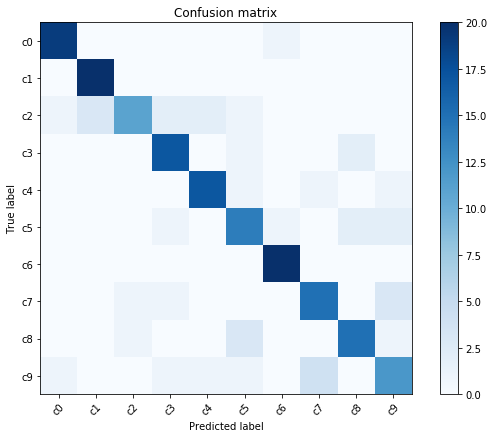

In [8]:
#plot the confusion matrix
plot_confusion_matrix(cm = confusion, target_names = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])